### 1. Prepare Training Data

In [1]:
# Imports
import numpy as np
import pandas as pd

In [2]:
# Read Files
training_data_female = pd.read_csv('../Data/file_list_female_parsed_with_data.csv')
training_data_male = pd.read_csv('../Data/file_list_male_parsed_with_data.csv')

# Make Sex Column
training_data_female['is_male'] = 0
training_data_male['is_male'] = 1

# Combine into One
training_data = pd.concat([training_data_female, training_data_male], ignore_index=True)
print(training_data.shape)
print(training_data.head())

(1001966, 17)
                experiment_name video_base_name  track_id  count_uncalibrated  \
0  MC_singlenuc23_1_Tk33_021220        0001_vid      1330                   0   
1  MC_singlenuc23_1_Tk33_021220        0001_vid      1330                   1   
2  MC_singlenuc23_1_Tk33_021220        0001_vid      1330                  10   
3  MC_singlenuc23_1_Tk33_021220        0001_vid      1330                 100   
4  MC_singlenuc23_1_Tk33_021220        0001_vid      1330                1000   

   new_count_uncalibrated          xc          yc     u_dot      v_dot  \
0                  382058  117.405639  104.372970  6.973857  22.796302   
1                  382059  123.302195  123.913192  6.585702  21.623125   
2                  382068  111.683189  400.633206 -0.382109  28.731078   
3                  382158  821.635502  527.801237  5.468046  -3.778739   
4                  383058  883.833486  309.388663  2.265553   0.529649   

         s_dot  class_id   p_value  track_length      

In [3]:
# Create Unique Identifier for Track
training_data['id'] = training_data['experiment_name'] + '__' + training_data['video_base_name'] + '__' + training_data['track_id'].astype(str)

# Save Class ID for Later
training_data_ids_and_labels = training_data[['is_male', 'id']].copy()

# Drop Potential Labels
training_data.drop('is_male', inplace=True, axis=1) 

# Drop Cols that We Don't Need
training_data.drop('w', inplace=True, axis=1) 
training_data.drop('h', inplace=True, axis=1) 
training_data.drop('xc', inplace=True, axis=1) 
training_data.drop('yc', inplace=True, axis=1) 
training_data.drop('p_value', inplace=True, axis=1) 
training_data.drop('track_id', inplace=True, axis=1) 
training_data.drop('class_id', inplace=True, axis=1)
training_data.drop('track_length', inplace=True, axis=1) 
training_data.drop('experiment_name', inplace=True, axis=1) 
training_data.drop('video_base_name', inplace=True, axis=1) 
training_data.drop('count_uncalibrated', inplace=True, axis=1) 
training_data.drop('new_count_uncalibrated', inplace=True, axis=1) 

# Check Modified Data
print("Modified CSV Data: \n") 
print(training_data)

Modified CSV Data: 

            u_dot      v_dot        s_dot   frame  \
0        6.973857  22.796302  4094.324244  382058   
1        6.585702  21.623125  4154.148577  382059   
2       -0.382109  28.731078  1993.790100  382068   
3        5.468046  -3.778739    82.335724  382158   
4        2.265553   0.529649    -4.429363  383058   
...           ...        ...          ...     ...   
1001961  4.437002   6.482767    23.792231  537123   
1001962  4.571728   5.991240    25.240829  537124   
1001963  4.938269   5.438280    26.805397  537125   
1001964  5.216379   5.043803    29.915899  537126   
1001965  5.565223   4.727619    30.420474  537127   

                                                    id  
0         MC_singlenuc23_1_Tk33_021220__0001_vid__1330  
1         MC_singlenuc23_1_Tk33_021220__0001_vid__1330  
2         MC_singlenuc23_1_Tk33_021220__0001_vid__1330  
3         MC_singlenuc23_1_Tk33_021220__0001_vid__1330  
4         MC_singlenuc23_1_Tk33_021220__0001_vid__1330  


### 2. Prepare Testing Data

In [4]:
# Read Files
annotation_csv = pd.read_csv('../Data/Result_2_0.csv')
yolo_csv = pd.read_csv('../Data/Result_2_1.csv')

# Check Files
print(annotation_csv.tail())
print(yolo_csv.tail())

        Unnamed: 0.1  Unnamed: 0  \
111614        112066      112066   
111615        112067      112067   
111616        112068      112068   
111617        112069      112069   
111618        112070      112070   

                                                val_paths  val_labels  \
111614  /home/bshi/Documents/Annotation2_0/final_resne...           1   
111615  /home/bshi/Documents/Annotation2_0/final_resne...           1   
111616  /home/bshi/Documents/Annotation2_0/final_resne...           1   
111617  /home/bshi/Documents/Annotation2_0/final_resne...           1   
111618  /home/bshi/Documents/Annotation2_0/final_resne...           1   

        val_predictions   val_acc                          trial base_name  \
111614                0  0.992329  MC_singlenuc96_b1_Tk41_081120  0001_vid   
111615                0  0.934512  MC_singlenuc96_b1_Tk41_081120  0001_vid   
111616                1  0.548051  MC_singlenuc96_b1_Tk41_081120  0001_vid   
111617                0  0.80896

C:\Users\kaiwi\AppData\Local\Temp\ipykernel_11332\544467837.py:3: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  yolo_csv = pd.read_csv('../Data/Result_2_1.csv')


In [5]:
# Create Better Col Names
annotation_csv = annotation_csv.rename(columns={'val_labels': 'true_labels'})
annotation_csv = annotation_csv.rename(columns={'val_predictions': 'result_2_0_prediction'})

# Remove Unwanted Cols
annotation_csv.drop('result_2_0_prediction', inplace=True, axis=1) 
annotation_csv.drop('val_paths', inplace=True, axis=1) 
annotation_csv.drop('trial', inplace=True, axis=1) 
annotation_csv.drop('base_name', inplace=True, axis=1) 
annotation_csv.drop('track_id', inplace=True, axis=1) 
annotation_csv.drop('frame', inplace=True, axis=1) 
annotation_csv.drop('err', inplace=True, axis=1) 
annotation_csv.drop('sex', inplace=True, axis=1) 
annotation_csv.drop('val_acc', inplace=True, axis=1) 
annotation_csv = annotation_csv.loc[:, ~annotation_csv.columns.str.contains('^Unnamed')]

# Check Updates
print(annotation_csv.tail())

        true_labels                                                uid
111614            1  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350__64
111615            1  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350__66
111616            1   MC_singlenuc96_b1_Tk41_081120__0001_vid__9350__7
111617            1  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350__79
111618            1  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350__83


In [6]:
# Create Better Col Names
yolo_csv = yolo_csv.rename(columns={'class_id': 'yolo_label_prediction'})

# Remove Unwanted Cols
yolo_csv.drop('InBounds', inplace=True, axis=1) 
yolo_csv.drop('trial', inplace=True, axis=1) 
yolo_csv.drop('base_name', inplace=True, axis=1) 
yolo_csv.drop('track_id', inplace=True, axis=1)
yolo_csv.drop('frame', inplace=True, axis=1)
yolo_csv.drop('track_length', inplace=True, axis=1)
yolo_csv.drop('err', inplace=True, axis=1)
yolo_csv.drop('w', inplace=True, axis=1)
yolo_csv.drop('h', inplace=True, axis=1)
yolo_csv.drop('a2_base_name', inplace=True, axis=1)
yolo_csv.drop('a2_track_id', inplace=True, axis=1)
yolo_csv.drop('p_value', inplace=True, axis=1)
yolo_csv.drop('iou', inplace=True, axis=1)
yolo_csv.drop('label', inplace=True, axis=1)
yolo_csv = yolo_csv.loc[:, ~yolo_csv.columns.str.contains('^Unnamed')]

# Check Updates
print(yolo_csv.tail())

              xc        yc  yolo_label_prediction     u_dot     v_dot  \
111614  0.229628  0.479246                    0.0  0.253403 -1.862108   
111615  0.331459  0.426181                    0.0  4.136577 -0.448796   
111616  0.230906  0.683723                    0.0 -2.758252  8.205466   
111617  0.184423  0.541897                    0.0 -4.437889 -5.116410   
111618  0.174173  0.534163                    0.0 -3.673923 -3.649581   

            s_dot  a2_frame                                                uid  
111614 -28.052752      1318  MC_singlenuc86_b1_Tk47_073020__0002_vid__5128_...  
111615 -46.965982      1341  MC_singlenuc86_b1_Tk47_073020__0002_vid__5128_...  
111616   9.487081      1365  MC_singlenuc86_b1_Tk47_073020__0002_vid__5128_...  
111617  37.912490      1389  MC_singlenuc86_b1_Tk47_073020__0002_vid__5128_...  
111618  43.385125      1394  MC_singlenuc86_b1_Tk47_073020__0002_vid__5128_...  


In [7]:
# Combine Information from Both
testing_data = pd.merge(annotation_csv, yolo_csv, on='uid')
testing_data['id'] = testing_data['uid'].str.rsplit('__', n=1).str[0]
print(testing_data.tail())

        true_labels                                                uid  \
111614            1  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350__64   
111615            1  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350__66   
111616            1   MC_singlenuc96_b1_Tk41_081120__0001_vid__9350__7   
111617            1  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350__79   
111618            1  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350__83   

              xc        yc  yolo_label_prediction     u_dot      v_dot  \
111614  0.051433  0.458018                    0.0 -2.655020  10.591085   
111615  0.048073  0.486484                    0.0 -2.566140  11.108756   
111616  0.248775  0.055500                    0.0  2.596401   3.663221   
111617  0.063819  0.602525                    0.0  0.374114   9.008227   
111618  0.068937  0.615685                    0.0  0.780527   7.137074   

             s_dot  a2_frame                                             id  
111614  114.385718        64  MC

### 3. Combine Training Frames by Track & Create Features

In [8]:
# Group Sex Labels by Track for Later
training_data_ids_and_labels = training_data_ids_and_labels.groupby('id')['is_male'].mean().round().astype(int).reset_index()
print(training_data_ids_and_labels)

                                                id  is_male
0     MC_singlenuc23_1_Tk33_021220__0001_vid__1330        0
1     MC_singlenuc23_1_Tk33_021220__0001_vid__1573        0
2     MC_singlenuc23_1_Tk33_021220__0001_vid__1640        0
3     MC_singlenuc23_1_Tk33_021220__0001_vid__1748        0
4     MC_singlenuc23_1_Tk33_021220__0001_vid__2085        0
..                                             ...      ...
666  MC_singlenuc96_b1_Tk41_081120__0001_vid__8792        1
667  MC_singlenuc96_b1_Tk41_081120__0001_vid__8893        1
668  MC_singlenuc96_b1_Tk41_081120__0001_vid__9161        0
669  MC_singlenuc96_b1_Tk41_081120__0001_vid__9345        0
670  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350        1

[671 rows x 2 columns]


In [9]:
def calculate_speed(df):
    df['speed'] = np.sqrt(df['u_dot']**2 + df['v_dot']**2)
    return df

def calculate_acceleration(u_dot, v_dot, time_intervals):
    u_dot = np.array(u_dot)
    v_dot = np.array(v_dot)
    time_intervals = np.array(time_intervals)
    ax = np.diff(u_dot) / time_intervals[:-1]
    ay = np.diff(v_dot) / time_intervals[:-1]
    acceleration = np.sqrt(ax**2 + ay**2)
    return ax, ay, acceleration

def calculate_velocity_magnitude(df):
    df['velocity_magnitude'] = np.sqrt(df['u_dot']**2 + df['v_dot']**2)
    return df

def calculate_velocity_angle(df):
    df['velocity_angle'] = np.arctan2(df['v_dot'], df['u_dot'])
    return df

def calculate_jerk(acceleration, time_intervals):
    jerk = np.diff(acceleration) / time_intervals[:-2]
    return jerk

def calculate_directional_change(df):
    df['velocity_angle'] = np.arctan2(df['v_dot'], df['u_dot'])
    df['directional_change'] = df['velocity_angle'].diff().fillna(0)
    return df

def calculate_rms_velocity(df):
    df['rms_velocity'] = np.sqrt((df['u_dot']**2 + df['v_dot']**2).mean())
    return df

def calculate_statistical_features(df, column):
    features = {
        'mean': df[column].mean(),
        'median': df[column].median(),
        'variance': df[column].var(),
        'std_dev': df[column].std()
    }
    return features

def calculate_spectral_features(df, column):
    fft_values = np.fft.fft(df[column])
    return fft_values

def calculate_autocorrelation(df, column):
    autocorr_values = np.correlate(df[column], df[column], mode='full')
    return autocorr_values

In [10]:
def create_features_from_track_id(training_data):
    features = []
    grouped = training_data.groupby('id')

    for track_id, group in grouped:
        group = group.sort_values(by='frame')
        group = calculate_speed(group)
        group = calculate_velocity_magnitude(group)
        group = calculate_velocity_angle(group)
        group = calculate_directional_change(group)
        group = calculate_rms_velocity(group)

        speed = group['speed'].mean()
        time_intervals = group['frame'].diff().fillna(1).values  # Assume frame difference as time interval
        ax, ay, acceleration = calculate_acceleration(group['u_dot'], group['v_dot'], time_intervals)
        mean_acceleration = np.mean(acceleration)
        jerk = calculate_jerk(acceleration, time_intervals).mean()
        directional_change = group['directional_change'].mean()
        rms_velocity = group['rms_velocity'].iloc[0]

        u_dot_stats = calculate_statistical_features(group, 'u_dot')
        v_dot_stats = calculate_statistical_features(group, 'v_dot')
        s_dot_stats = calculate_statistical_features(group, 's_dot')

        fft_u_dot = calculate_spectral_features(group, 'u_dot')
        fft_v_dot = calculate_spectral_features(group, 'v_dot')
        fft_s_dot = calculate_spectral_features(group, 's_dot')

        autocorr_u_dot = calculate_autocorrelation(group, 'u_dot')
        autocorr_v_dot = calculate_autocorrelation(group, 'v_dot')

        features.append({
            'id': track_id,
            'speed': speed,
            'mean_acceleration': mean_acceleration,
            'jerk': jerk,
            'directional_change': directional_change,
            'rms_velocity': rms_velocity,
            #'u_dot_mean': u_dot_stats['mean'],
            #'u_dot_median': u_dot_stats['median'],
            ###'u_dot_variance': u_dot_stats['variance'],
            ###'u_dot_std_dev': u_dot_stats['std_dev'],
            #'v_dot_mean': v_dot_stats['mean'],
            #'v_dot_median': v_dot_stats['median'],
            ###'v_dot_variance': v_dot_stats['variance'],
            ###'v_dot_std_dev': v_dot_stats['std_dev'],
            #'s_dot_mean': s_dot_stats['mean'],
            #'s_dot_median': s_dot_stats['median'],
            #'s_dot_variance': s_dot_stats['variance'],
            #'s_dot_std_dev': s_dot_stats['std_dev'],
            #'fft_u_dot': fft_u_dot,
            #'fft_v_dot': fft_v_dot,
            #'fft_s_dot': fft_s_dot,
            #'autocorr_u_dot': autocorr_u_dot,
            #'autocorr_v_dot': autocorr_v_dot
        })

    return pd.DataFrame(features)

# Create features from the example data
training_data_with_features = create_features_from_track_id(training_data)
print(training_data_with_features.head())

                                             id     speed  mean_acceleration  \
0  MC_singlenuc23_1_Tk33_021220__0001_vid__1330  2.669734           0.281946   
1  MC_singlenuc23_1_Tk33_021220__0001_vid__1573  2.306083           0.272332   
2  MC_singlenuc23_1_Tk33_021220__0001_vid__1640  2.884547           0.269384   
3  MC_singlenuc23_1_Tk33_021220__0001_vid__1748  2.867001           0.295195   
4  MC_singlenuc23_1_Tk33_021220__0001_vid__2085  2.646049           0.268153   

       jerk  directional_change  rms_velocity  
0 -0.007833           -0.000907      3.849834  
1 -0.007964           -0.000857      3.124012  
2 -0.008324           -0.000272      3.642730  
3 -0.007652           -0.001780      3.896280  
4 -0.008244           -0.001285      3.467476  


In [11]:
training_data = pd.merge(training_data_ids_and_labels, training_data_with_features, on='id')
print(training_data)

                                                id  is_male     speed  \
0     MC_singlenuc23_1_Tk33_021220__0001_vid__1330        0  2.669734   
1     MC_singlenuc23_1_Tk33_021220__0001_vid__1573        0  2.306083   
2     MC_singlenuc23_1_Tk33_021220__0001_vid__1640        0  2.884547   
3     MC_singlenuc23_1_Tk33_021220__0001_vid__1748        0  2.867001   
4     MC_singlenuc23_1_Tk33_021220__0001_vid__2085        0  2.646049   
..                                             ...      ...       ...   
666  MC_singlenuc96_b1_Tk41_081120__0001_vid__8792        1  7.188265   
667  MC_singlenuc96_b1_Tk41_081120__0001_vid__8893        1  4.243637   
668  MC_singlenuc96_b1_Tk41_081120__0001_vid__9161        0  1.225791   
669  MC_singlenuc96_b1_Tk41_081120__0001_vid__9345        0  2.434414   
670  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350        1  5.231545   

     mean_acceleration      jerk  directional_change  rms_velocity  
0             0.281946 -0.007833           -0.000907  

In [12]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kaiwi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


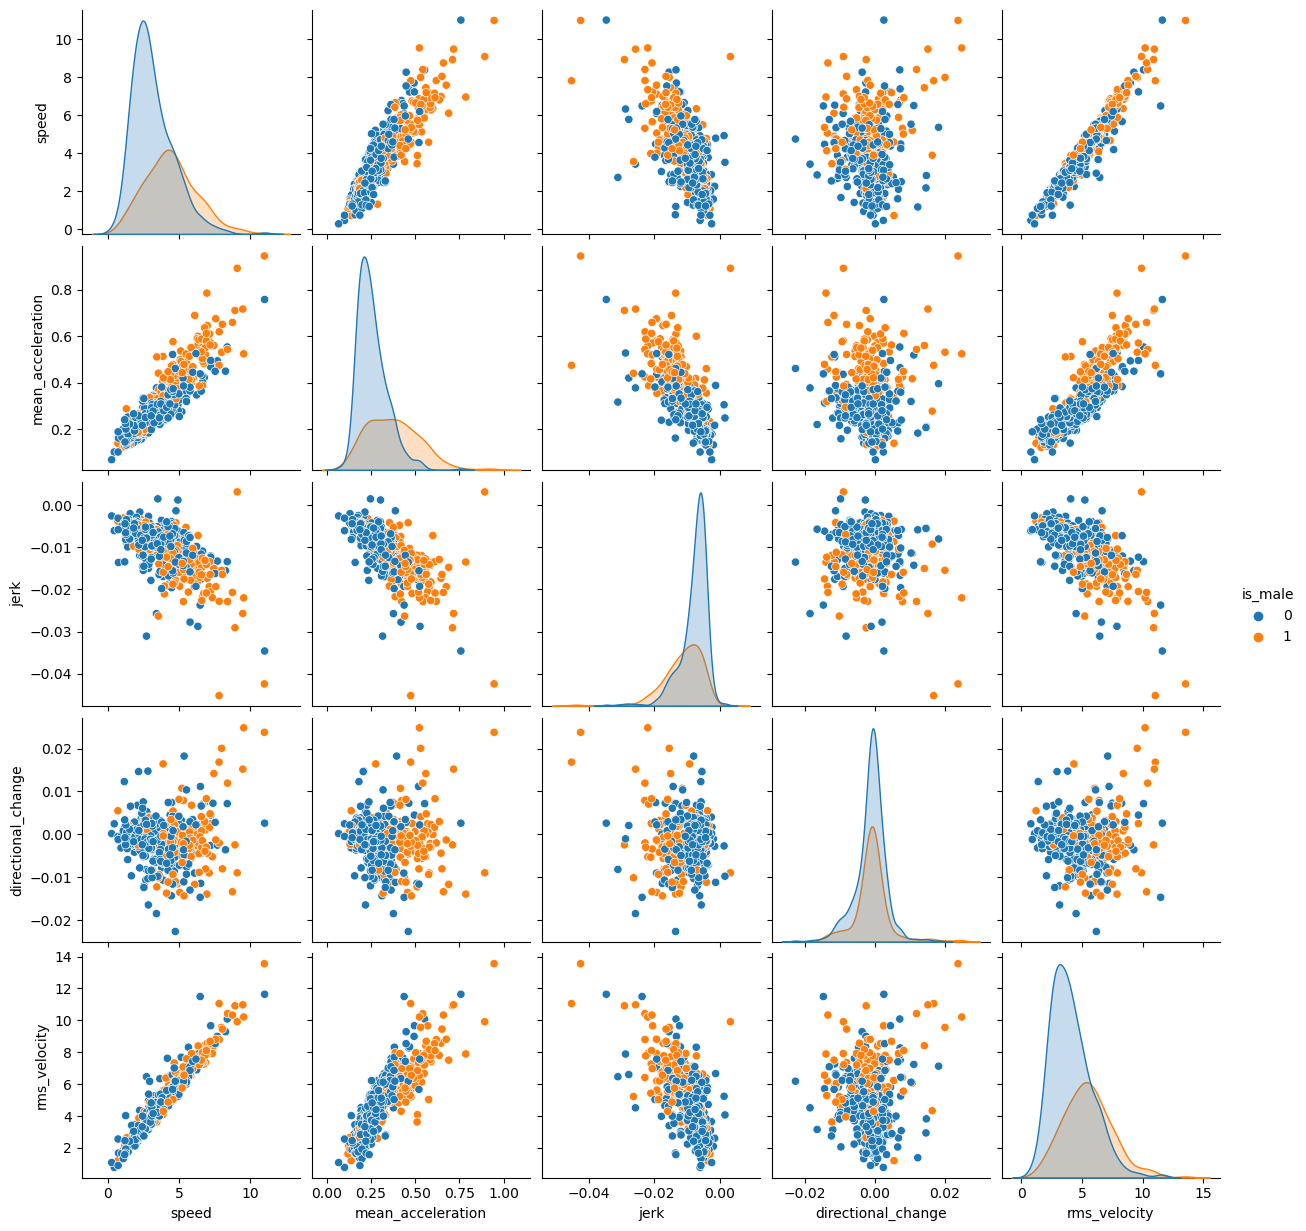

In [13]:
training_data_viz = training_data.drop('id', axis=1)
pair_plot = sns.pairplot(training_data_viz, hue='is_male')
plt.show()

### 4. Combine Testing Frames by Track & Create Features

In [14]:
testing_data_ids_and_labels = testing_data.groupby('id')['true_labels'].mean().round().astype(int).reset_index()
print(testing_data_ids_and_labels)

                                                id  true_labels
0     MC_singlenuc23_1_Tk33_021220__0001_vid__1330            0
1     MC_singlenuc23_1_Tk33_021220__0001_vid__1573            0
2     MC_singlenuc23_1_Tk33_021220__0001_vid__1640            0
3     MC_singlenuc23_1_Tk33_021220__0001_vid__1748            0
4     MC_singlenuc23_1_Tk33_021220__0001_vid__2085            0
..                                             ...          ...
666  MC_singlenuc96_b1_Tk41_081120__0001_vid__8792            1
667  MC_singlenuc96_b1_Tk41_081120__0001_vid__8893            1
668  MC_singlenuc96_b1_Tk41_081120__0001_vid__9161            0
669  MC_singlenuc96_b1_Tk41_081120__0001_vid__9345            0
670  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350            1

[671 rows x 2 columns]


In [15]:
def create_features_from_track_id(testing_data):
    features = []
    grouped = testing_data.groupby('id')

    for track_id, group in grouped:
        group = group.sort_values(by='a2_frame')
        group = calculate_speed(group)
        group = calculate_velocity_magnitude(group)
        group = calculate_velocity_angle(group)
        group = calculate_directional_change(group)
        group = calculate_rms_velocity(group)

        speed = group['speed'].mean()
        time_intervals = group['a2_frame'].diff().fillna(1).values  # Assume frame difference as time interval
        ax, ay, acceleration = calculate_acceleration(group['u_dot'], group['v_dot'], time_intervals)
        mean_acceleration = np.mean(acceleration)
        jerk = calculate_jerk(acceleration, time_intervals).mean()
        directional_change = group['directional_change'].mean()
        rms_velocity = group['rms_velocity'].iloc[0]

        u_dot_stats = calculate_statistical_features(group, 'u_dot')
        v_dot_stats = calculate_statistical_features(group, 'v_dot')
        s_dot_stats = calculate_statistical_features(group, 's_dot')

        fft_u_dot = calculate_spectral_features(group, 'u_dot')
        fft_v_dot = calculate_spectral_features(group, 'v_dot')
        fft_s_dot = calculate_spectral_features(group, 's_dot')

        autocorr_u_dot = calculate_autocorrelation(group, 'u_dot')
        autocorr_v_dot = calculate_autocorrelation(group, 'v_dot')

        features.append({
            'id': track_id,
            'speed': speed,
            'mean_acceleration': mean_acceleration,
            'jerk': jerk,
            'directional_change': directional_change,
            'rms_velocity': rms_velocity,
            #'u_dot_mean': u_dot_stats['mean'],
            #'u_dot_median': u_dot_stats['median'],
            ###'u_dot_variance': u_dot_stats['variance'],
            ###'u_dot_std_dev': u_dot_stats['std_dev'],
            #'v_dot_mean': v_dot_stats['mean'],
            #'v_dot_median': v_dot_stats['median'],
            ###'v_dot_variance': v_dot_stats['variance'],
            ###'v_dot_std_dev': v_dot_stats['std_dev'],
            #'s_dot_mean': s_dot_stats['mean'],
            #'s_dot_median': s_dot_stats['median'],
            #'s_dot_variance': s_dot_stats['variance'],
            #'s_dot_std_dev': s_dot_stats['std_dev'],
            #'fft_u_dot': fft_u_dot,
            #'fft_v_dot': fft_v_dot,
            #'fft_s_dot': fft_s_dot,
            #'autocorr_u_dot': autocorr_u_dot,
            #'autocorr_v_dot': autocorr_v_dot
        })

    return pd.DataFrame(features)

# Create features from the example data
testing_data_with_features = create_features_from_track_id(testing_data)
print(testing_data_with_features.head())

                                             id     speed  mean_acceleration  \
0  MC_singlenuc23_1_Tk33_021220__0001_vid__1330  2.629201           0.321134   
1  MC_singlenuc23_1_Tk33_021220__0001_vid__1573  2.368859           0.315716   
2  MC_singlenuc23_1_Tk33_021220__0001_vid__1640  3.038746           0.315944   
3  MC_singlenuc23_1_Tk33_021220__0001_vid__1748  3.170401           0.342582   
4  MC_singlenuc23_1_Tk33_021220__0001_vid__2085  2.747095           0.313087   

       jerk  directional_change  rms_velocity  
0 -0.110823           -0.008952      3.609359  
1 -0.081295           -0.001442      3.417735  
2 -0.091849           -0.002012      4.024899  
3 -0.086605           -0.010452      4.715279  
4 -0.069882           -0.018502      3.681212  


In [16]:
testing_data = pd.merge(testing_data_ids_and_labels, testing_data_with_features, on='id')
print(testing_data)

                                                id  true_labels     speed  \
0     MC_singlenuc23_1_Tk33_021220__0001_vid__1330            0  2.629201   
1     MC_singlenuc23_1_Tk33_021220__0001_vid__1573            0  2.368859   
2     MC_singlenuc23_1_Tk33_021220__0001_vid__1640            0  3.038746   
3     MC_singlenuc23_1_Tk33_021220__0001_vid__1748            0  3.170401   
4     MC_singlenuc23_1_Tk33_021220__0001_vid__2085            0  2.747095   
..                                             ...          ...       ...   
666  MC_singlenuc96_b1_Tk41_081120__0001_vid__8792            1  7.954274   
667  MC_singlenuc96_b1_Tk41_081120__0001_vid__8893            1  4.272279   
668  MC_singlenuc96_b1_Tk41_081120__0001_vid__9161            0  1.160454   
669  MC_singlenuc96_b1_Tk41_081120__0001_vid__9345            0  2.647480   
670  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350            1  6.040704   

     mean_acceleration      jerk  directional_change  rms_velocity  
0     

### 5. Create Clustering Feature

In [17]:
# Imports
from sklearn.preprocessing import StandardScaler

In [18]:
# Split into X and y
X_train = training_data.drop('is_male', axis=1)
X_train = X_train.drop('id', axis=1)
y_train = training_data['is_male']
X_test = testing_data.drop('true_labels', axis=1)
X_test = X_test.drop('id', axis=1)
y_test = testing_data['true_labels']

# Check Shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(671, 5)
(671, 5)
(671,)
(671,)


In [19]:
# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# This cell is to prevent the KMeans memory leak on Windows with MKL.
import os
os.environ['OMP_NUM_THREADS'] = '3'

In [21]:
# Imports
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [22]:
# Use Silhouette Score for Finding Num Components
silhouette_scores = []
for n_components in range(2, 11):
    gm = GaussianMixture(n_components=n_components, init_params='random', random_state=8).fit(X_train)
    labels = gm.predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, labels))
best_n_components = np.argmax(silhouette_scores) + 2  # Add 2 because we started from 2 components
print("Best number of components:", best_n_components)

Best number of components: 2


In [23]:
# Use BIC Score to Choose Num Components
### Using BIC because it works better for smaller datasets that are less complex compared to AIC.
### If I don't use init_params='random', I get 2 clusters, but this init uses k means, which has Windows memory leak.
n_components = np.arange(1, 11) 
models = [GaussianMixture(n, init_params='random', covariance_type='full', random_state=8).fit(X_train) for n in n_components]
bic_scores = [model.bic(X_train) for model in models]
best_n = n_components[np.argmin(bic_scores)]
print("Best number of clusters:", best_n)

Best number of clusters: 3


In [24]:
# Use AIC Score to Choose Num Components
n_components = np.arange(1, 11)
models = [GaussianMixture(n, init_params='random', covariance_type='full', random_state=8).fit(X_train) for n in n_components]
aic_scores = [model.aic(X_train) for model in models]
best_n = n_components[np.argmin(aic_scores)]
print("Best number of clusters:", best_n)

Best number of clusters: 9


In [25]:
# Cluster
gm = GaussianMixture(n_components=3, random_state=0)
gm = gm.fit(X_train.values)
labels = gm.predict(X_train.values)
training_data['cluster'] = gm.fit_predict(X_train)

# Check Clusters
print(training_data.tail())

                                                id  is_male     speed  \
666  MC_singlenuc96_b1_Tk41_081120__0001_vid__8792        1  7.188265   
667  MC_singlenuc96_b1_Tk41_081120__0001_vid__8893        1  4.243637   
668  MC_singlenuc96_b1_Tk41_081120__0001_vid__9161        0  1.225791   
669  MC_singlenuc96_b1_Tk41_081120__0001_vid__9345        0  2.434414   
670  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350        1  5.231545   

     mean_acceleration      jerk  directional_change  rms_velocity  cluster  
666           0.562417 -0.016421            0.004775      8.684992        0  
667           0.447011 -0.014576           -0.011163      4.871862        0  
668           0.143933 -0.004367           -0.000797      2.452611        2  
669           0.216220 -0.008316           -0.002443      3.325983        2  
670           0.443116 -0.013807           -0.006584      5.753525        0  


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


C:\Users\kaiwi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


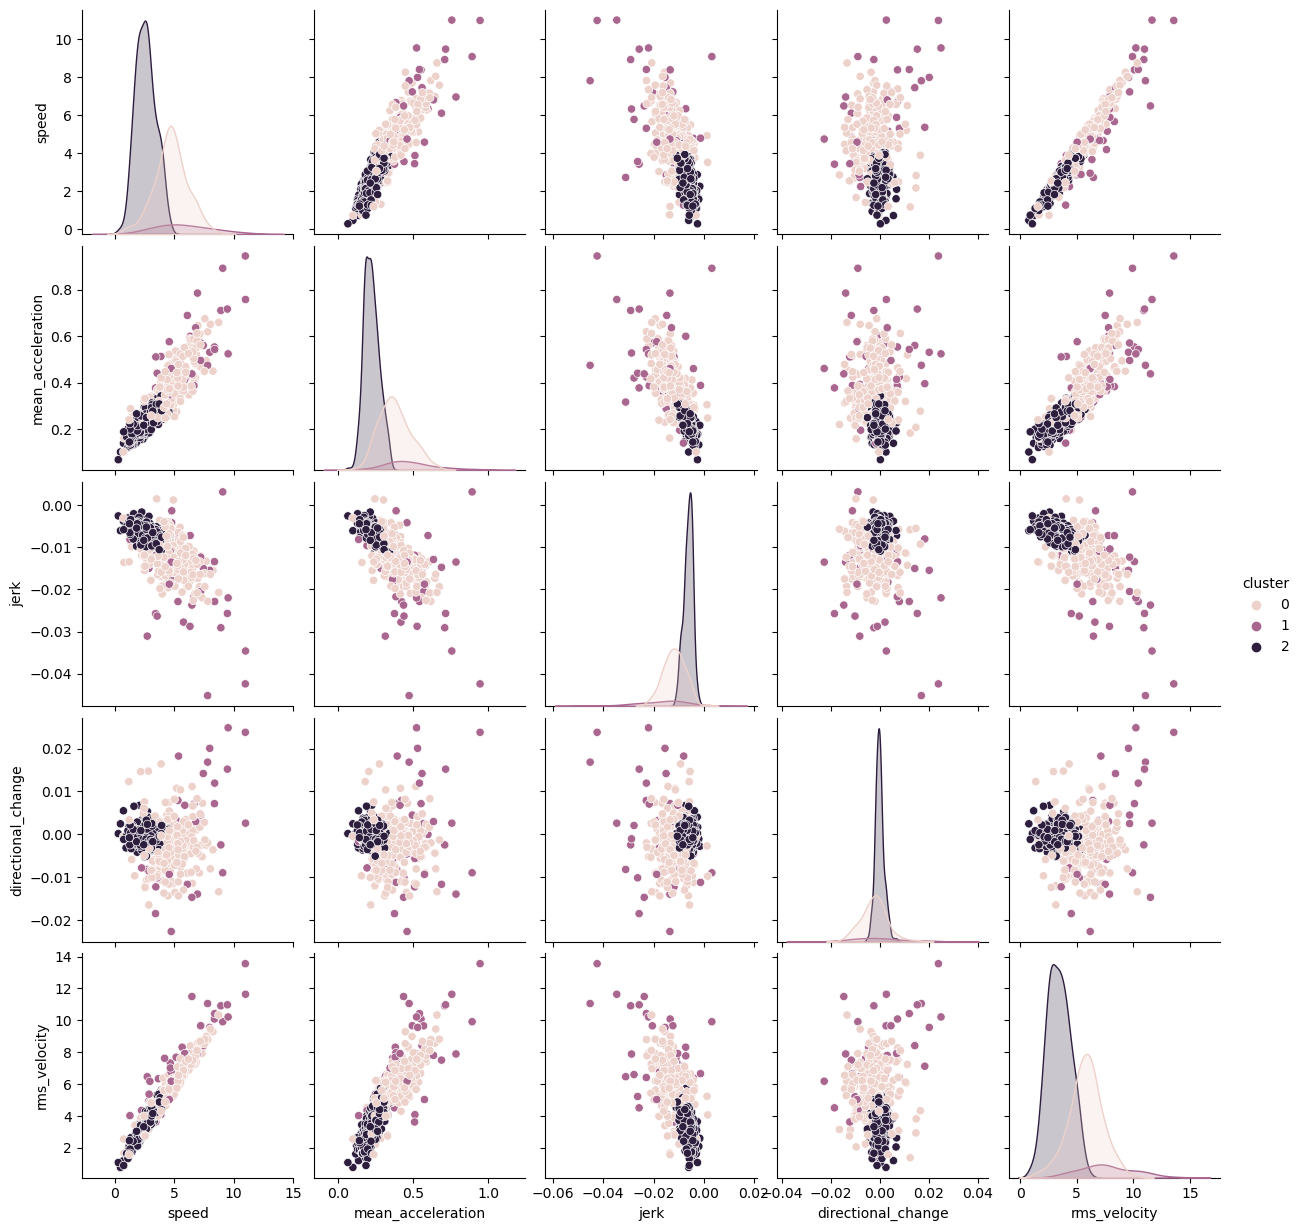

In [26]:
pair_plot_training_clustering = training_data.drop(['id', 'is_male'], axis=1)
pair_plot = sns.pairplot(pair_plot_training_clustering, hue='cluster')
plt.show()

In [27]:
# Cluster Test Using Predict Only
testing_data['cluster'] = gm.predict(X_test.values)
print(testing_data.tail())

                                                id  true_labels     speed  \
666  MC_singlenuc96_b1_Tk41_081120__0001_vid__8792            1  7.954274   
667  MC_singlenuc96_b1_Tk41_081120__0001_vid__8893            1  4.272279   
668  MC_singlenuc96_b1_Tk41_081120__0001_vid__9161            0  1.160454   
669  MC_singlenuc96_b1_Tk41_081120__0001_vid__9345            0  2.647480   
670  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350            1  6.040704   

     mean_acceleration      jerk  directional_change  rms_velocity  cluster  
666           0.933643 -0.332457            0.039277      9.017232        1  
667           0.716699 -0.417049           -0.076519      4.831568        1  
668           0.131256 -0.037282            0.005836      2.327982        1  
669           0.260918 -0.060853           -0.019043      3.618271        1  
670           0.753786 -0.354508           -0.052171      6.658862        1  


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


### 6. Test Dataset Using Tuned DT

In [28]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score

In [29]:
# Split into X and y
X_train = training_data.drop('is_male', axis=1)
X_train = X_train.drop('id', axis=1)
y_train = training_data['is_male']
X_test = testing_data.drop('true_labels', axis=1)
X_test = X_test.drop('id', axis=1)
y_test = testing_data['true_labels']

# Check Shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(671, 6)
(671, 6)
(671,)
(671,)


In [30]:
# Default Classifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy on Default: {accuracy*100:.2f}%")

Test Accuracy on Default: 65.28%


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [  6  18  30  42  54  66  79  91 103 115 127 140 152 164 176 188 200 213
 225 237 249 261 274 286 298 310 322 334 347 359 371 383 395 408 420 432
 444 456 468 481 493 505 517 529 542 554 566 578 590 603]
The highest cross-validation score is achieved at training size: 359


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished


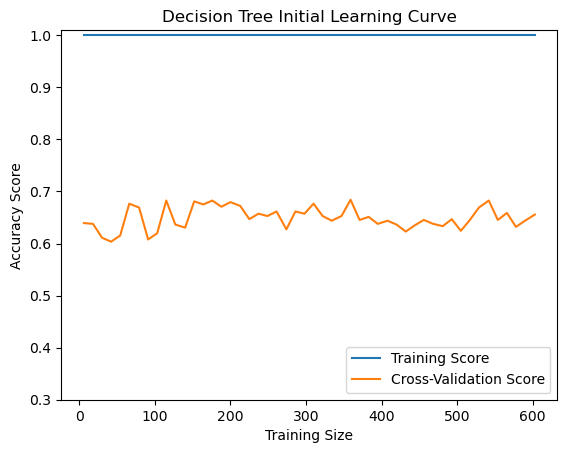

In [31]:
# Build Initial Learning Curve
# n_jobs=-1 means that we are using all available cores
decision_tree_clf = classifier
train_sizes, train_scores, test_scores = learning_curve(
    decision_tree_clf, 
    X_train, 
    y_train, 
    cv = 10, 
    scoring='accuracy', 
    n_jobs=-1, 
    train_sizes=np.linspace(0.01, 1, 50), 
    verbose=1
)

# Find the Means of Training and Testing Scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot Results
plt.title("Decision Tree Initial Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.legend(loc="lower right")

# Set y-axis limits explicitly
plt.ylim(0.3, 1.01)

# Find Best Number of Samples
highest_cv_index = np.argmax(test_mean)
highest_cv_size = train_sizes[highest_cv_index]
print(f"The highest cross-validation score is achieved at training size: {highest_cv_size}")

# Save Plot for Report
plt.show()

Best Min Samples Leaf: 75


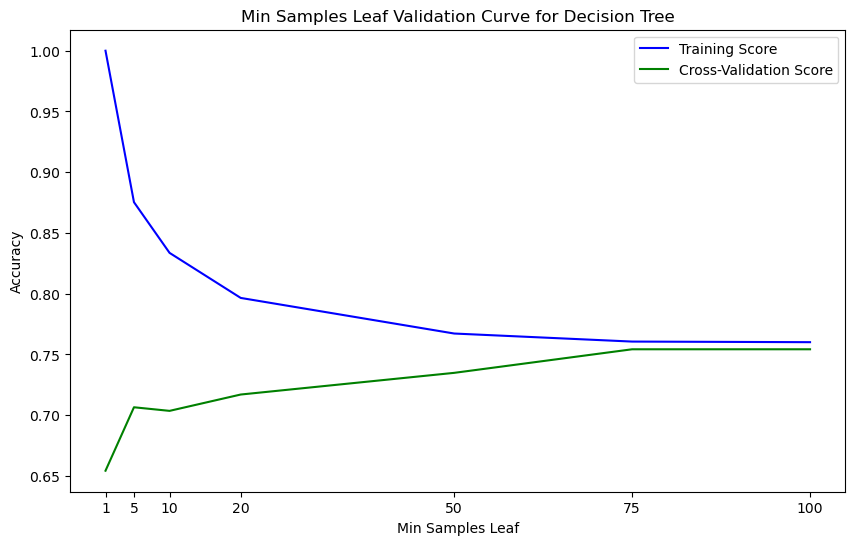

In [32]:
# Create Validation Curve
min_samples_values = [1, 5, 10, 20, 50, 75, 100]
train_scores, test_scores = validation_curve(
    decision_tree_clf, 
    X_train, 
    y_train, 
    param_name="min_samples_leaf", 
    param_range=min_samples_values, 
    cv=10, 
    scoring="accuracy", 
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the Validation Curve
plt.figure(figsize=(10, 6))
plt.title('Min Samples Leaf Validation Curve for Decision Tree')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')

# Plot Scores
plt.plot(min_samples_values, train_scores_mean, label='Training Score', color='blue')
plt.plot(min_samples_values, test_scores_mean, label='Cross-Validation Score', color='green')
plt.legend(loc="best")
plt.xticks(min_samples_values)

# Find Max Score Index and Get Corresponding Value
best_min_samples_index = np.argmax(np.mean(test_scores, axis=1))
best_min_samples_leaf = min_samples_values[best_min_samples_index]
print("Best Min Samples Leaf:", best_min_samples_leaf)

# Save Plot for Report
plt.show()

Best Min Samples Split: 100


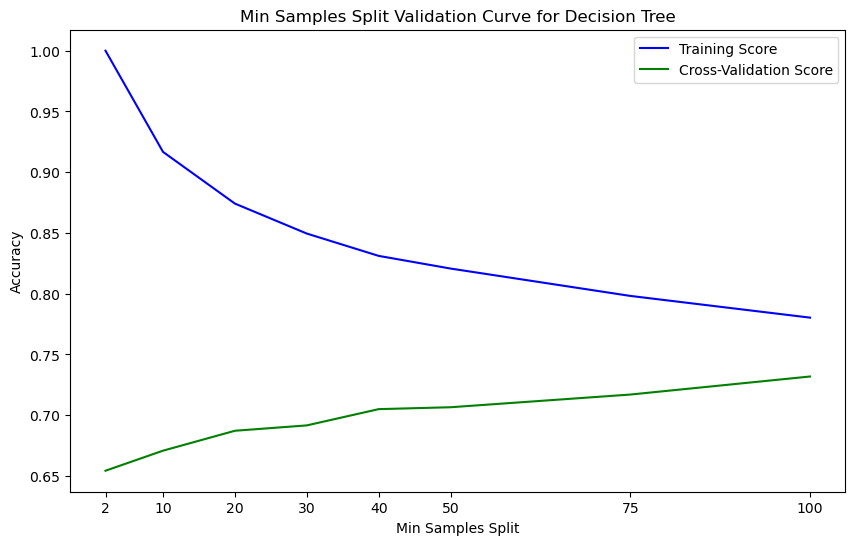

In [33]:
# Create Validation Curve
min_samples_values = [2, 10, 20, 30, 40, 50, 75, 100]
train_scores, test_scores = validation_curve(
    decision_tree_clf, 
    X_train, 
    y_train, 
    param_name="min_samples_split", 
    param_range=min_samples_values, 
    cv=10, 
    scoring="accuracy", 
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the Validation Curve
plt.figure(figsize=(10, 6))
plt.title('Min Samples Split Validation Curve for Decision Tree')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')

# Plot Scores
plt.plot(min_samples_values, train_scores_mean, label='Training Score', color='blue')
plt.plot(min_samples_values, test_scores_mean, label='Cross-Validation Score', color='green')
plt.legend(loc="best")
plt.xticks(min_samples_values)

# Find Max Score Index and Get Corresponding Value
best_min_samples_index = np.argmax(np.mean(test_scores, axis=1))
best_min_samples_split = min_samples_values[best_min_samples_index]
print("Best Min Samples Split:", best_min_samples_split)

# Save Plot for Report
plt.show()

Best Max Depth: 1


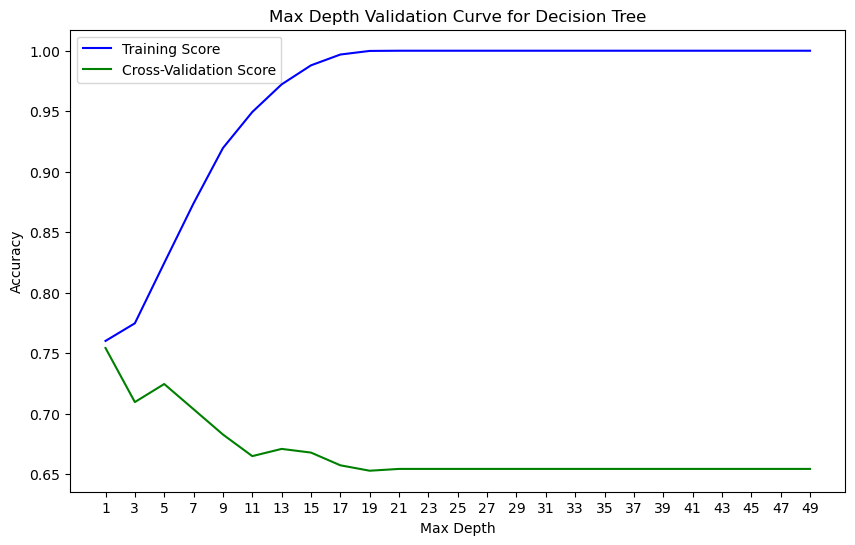

In [34]:
# Create Validation Curve
max_depth_values = np.arange(1, 51, 2)
train_scores, test_scores = validation_curve(
    decision_tree_clf, 
    X_train, 
    y_train, 
    param_name="max_depth", 
    param_range=max_depth_values, 
    cv=10, 
    scoring="accuracy", 
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the Validation Curve
plt.figure(figsize=(10, 6))
plt.title('Max Depth Validation Curve for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Plot Scores
plt.plot(max_depth_values, train_scores_mean, label='Training Score', color='blue')
plt.plot(max_depth_values, test_scores_mean, label='Cross-Validation Score', color='green')
plt.legend(loc="best")
plt.xticks(max_depth_values)

# Find Max Score Index and Get Corresponding Value
best_max_depth_index = np.argmax(np.mean(test_scores, axis=1))
best_max_depth = max_depth_values[best_max_depth_index]
print("Best Max Depth:", best_max_depth)

# Save Plot for Report
plt.show()

gini: 0.754214223002634
entropy: 0.754214223002634
log_loss: 0.754214223002634
gini


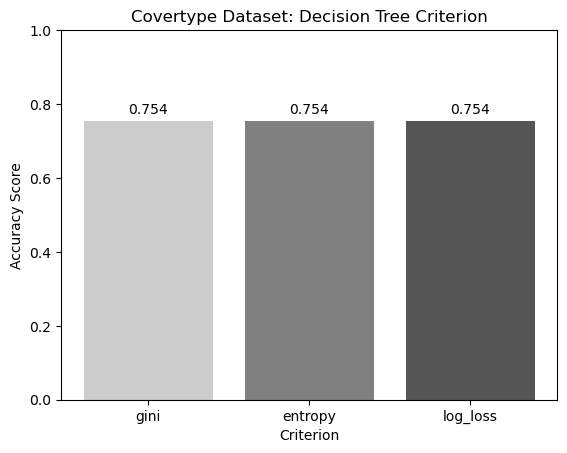

In [35]:
# Compare Criteria
criteria = ['gini', 'entropy', 'log_loss']
performance_scores = []
accuracy_scorer = make_scorer(accuracy_score)
best_score = -1
best_criteria = ''

# Save Info for Each
for criterion in criteria:
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=best_max_depth, random_state=42)
    clf.fit(X_train, y_train)
    cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=accuracy_scorer, n_jobs=-1)
    y_pred = clf.predict(X_test)
    
    # Get the Mean Validation Score on the Last Sample
    last_sample_score = np.mean(cross_val_scores)
    
    # Get this Mean
    performance = np.mean(cross_val_scores)
    print(str(criterion) + ": "+ str(performance))
    performance_scores.append(performance)
    
    # Save Best Hyperparameter Value
    if last_sample_score > best_score:
        best_score = last_sample_score
        best_criteria = criterion
        
# Print Best
print(best_criteria)

# Create Chart
plt.bar(criteria, performance_scores, color=['#CCCCCC', '#808080', '#555555'])
plt.title('Covertype Dataset: Decision Tree Criterion')
plt.xlabel('Criterion')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
for i, performance in enumerate(performance_scores):
    plt.text(i, performance + 0.01, f'{performance:.3f}', ha='center', va='bottom')
# plt.savefig('Covertype_DT_VC_Criterion.png')
plt.show()

In [36]:
# Use Sklearn
classifier = DecisionTreeClassifier(random_state=0, 
                                   criterion=best_criteria,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf)

# Train
classifier.fit(X_train, y_train)

# Test
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy on Tuned: {accuracy*100:.2f}%")

Test Accuracy on Tuned: 63.64%


In [37]:
# Default is Better than Tuned
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy on Default: {accuracy*100:.2f}%")

Test Accuracy on Default: 65.28%
